<a href="https://colab.research.google.com/github/TsukaMizu/PraktikumMLB1/blob/main/Tugas1_DavidCristianBatubara_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **David Cristian Batubara**
# **24060122130094**
# **Pinguins**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Melihat dimensi dari dataset

print(penguins.shape)
#(150, 5) menujukkan 150 sampel data dan 5 atribut data

(344, 7)


In [ ]:
# melihat isi dataset
print(penguins.head(20))

   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
3   Adelie  Torgersen             NaN            NaN                NaN   
4   Adelie  Torgersen            36.7           19.3              193.0   
5   Adelie  Torgersen            39.3           20.6              190.0   
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.0   
12  Adelie  Torgersen    

In [ ]:
label_encoder = LabelEncoder()
penguins['sex'] = label_encoder.fit_transform(penguins['sex'])  # 'female' becomes 0, 'male' becomes 1

In [ ]:
#distribusi kelas data
print(penguins.groupby('species').size())

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64


In [ ]:
#Ringkasan statistik
print(penguins.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              sex  
count  344.000000  
mean     0.552326  
std      0.558680  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      2.000000  


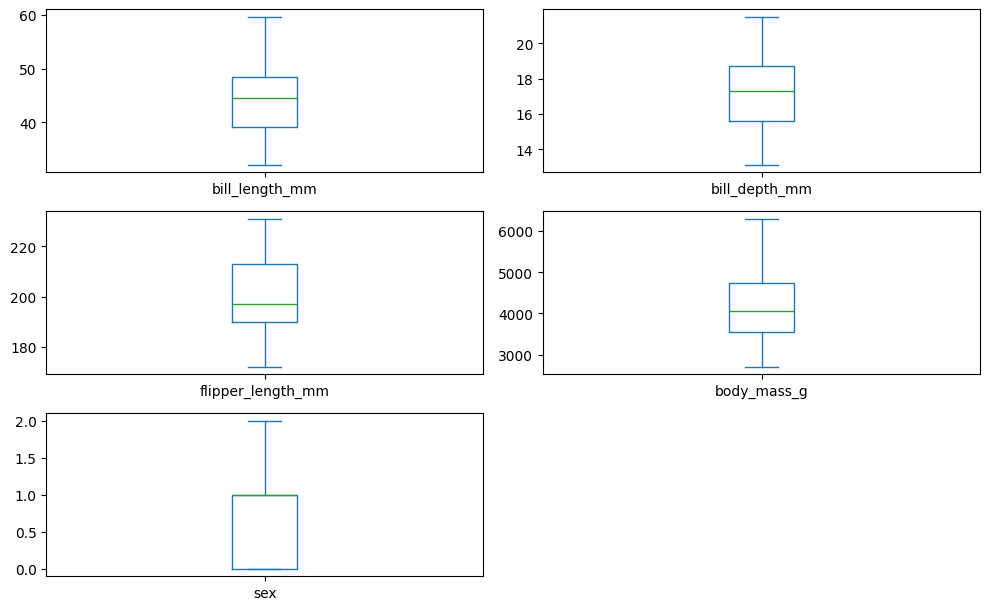

In [ ]:
# Visualisasi data menggunakan plot univariat
# Mengubah layout agar sesuai dengan jumlah kolom data
penguins.plot(kind='box', subplots=True, layout=(4, 2), sharex=False, sharey=False, figsize=(10, 8))  # Adjust figsize as needed
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

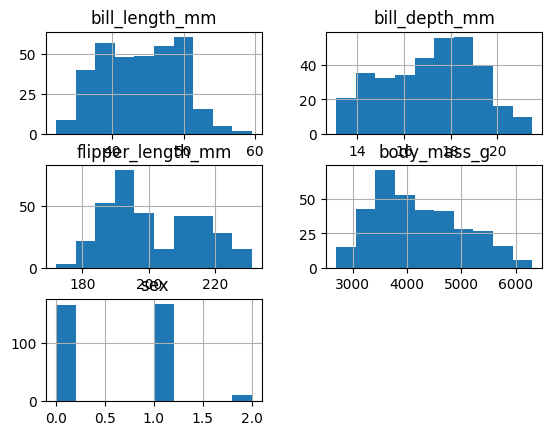

In [ ]:
#Selanjutnya juga bisa membuat histogram masing-masing variabel input untuk mendapatkan ide tentang distribusi.
penguins.hist()
plt.show()

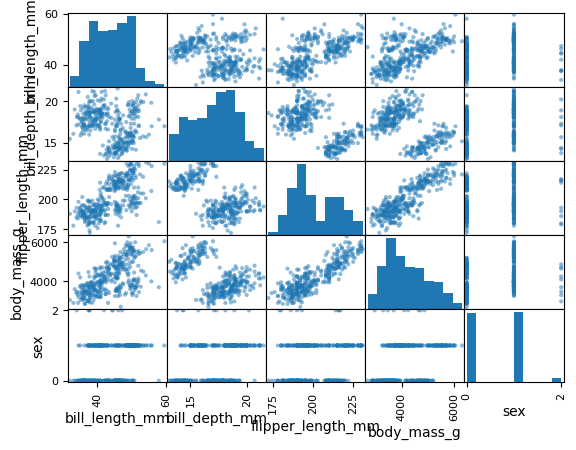

In [ ]:
#Visualisasi menggunakan plot multivariat
scatter_matrix(penguins)
plt.show()

In [ ]:
penguins = penguins.dropna()

# Define features (X) and target (y)
X = penguins.drop(columns=["species","island"])  # Drop the target column
y = penguins["species"]  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training + validation (80%) and testing (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Further split training + validation set into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42, stratify=y_train_val)

In [ ]:
print(len(X_train))
print(len(y_train))

238
238


In [ ]:
# Encode the target variable 'species' using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode y_train
y_val_encoded = label_encoder.transform(y_val)       # Encode y_val (using the same encoder)
y_test_encoded = label_encoder.transform(y_test)     # Encode y_test (using the same encoder)

# Now use y_train_encoded in your model training
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Define the seed for reproducibility and scoring method
seed = 42
scoring = 'accuracy'

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train_encoded, cv=kfold, scoring=scoring) # Use y_train_encoded
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
    print(msg)

KNN: 0.9915 (0.0170)
NB: 0.9707 (0.0268)
SVM: 0.9915 (0.0170)


In [ ]:
svm = SVC()
svm.fit(X_train, y_train)  # Fit the model with X_train and y_train

# Make predictions on the validation set
predictions = svm.predict(X_val)

# Evaluate the model
print("Accuracy on validation set:", accuracy_score(y_val, predictions))  # Accuracy
print("\nConfusion Matrix:\n", confusion_matrix(y_val, predictions))  # Confusion matrix
print("\nClassification Report:\n", classification_report(y_val, predictions))  # Classifica

Accuracy on validation set: 0.9428571428571428

Confusion Matrix:
 [[15  0  0]
 [ 2  5  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.88      1.00      0.94        15
   Chinstrap       1.00      0.71      0.83         7
      Gentoo       1.00      1.00      1.00        13

    accuracy                           0.94        35
   macro avg       0.96      0.90      0.92        35
weighted avg       0.95      0.94      0.94        35



In [ ]:
from sklearn import tree
X = penguins.drop(columns=["species","island"])  # Drop the target column
y = penguins["species"]  # Target variable
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.640625, 0.9285714285714286, 'x[2] <= 206.5\ngini = 0.636\nsamples = 342\nvalue = [151, 68, 123]'),
 Text(0.46875, 0.7857142857142857, 'x[0] <= 43.35\ngini = 0.423\nsamples = 213\nvalue = [149, 63, 1]'),
 Text(0.5546875, 0.8571428571428572, 'True  '),
 Text(0.3125, 0.6428571428571429, 'x[0] <= 42.35\ngini = 0.064\nsamples = 150\nvalue = [145, 5, 0]'),
 Text(0.1875, 0.5, 'x[1] <= 16.65\ngini = 0.014\nsamples = 139\nvalue = [138, 1, 0]'),
 Text(0.125, 0.35714285714285715, 'x[0] <= 39.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1, 0]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.1875, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 128\nvalue = [128, 0, 0]'),
 Text(0.4375, 0.5, 'x[1] <= 17.45\ngini = 0.463\nsamples = 11\nvalue = [7, 4, 0]'),
 Text(0.375, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.5, 0.35714285714285715, 'gini 

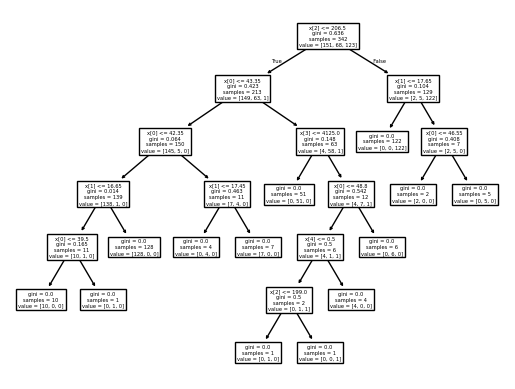

In [ ]:
tree.plot_tree(clf)